In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
import matplotlib.pyplot as plt
#import seaborn as sns

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

print('starting up')
indir_multiclass = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
#indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Retro/retro_on_new_muon_test_set.csv"
indir_position = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"


multiclass = pd.read_csv(indir_multiclass).reset_index(drop = True)
#track_cascade = pd.read_csv(indir_track_cascade).reset_index(drop = True)
energy = pd.read_csv(indir_energy).reset_index(drop = True)
zenith = pd.read_csv(indir_zenith).reset_index(drop = True)
azimuth = pd.read_csv(indir_azimuth).reset_index(drop = True)
position = pd.read_csv(indir_position).reset_index(drop = True)
retro = pd.read_csv(indir_retro).reset_index(drop = True)

neutrino_event_nos = multiclass['event_no'][multiclass['pid'].isin((-12,12,-14,14,-16,16)).to_list()]
energy = energy[energy['event_no'].isin(neutrino_event_nos)]
zenith = zenith[zenith['event_no'].isin(neutrino_event_nos)]
azimuth = azimuth[azimuth['event_no'].isin(neutrino_event_nos)]
position = position[position['event_no'].isin(neutrino_event_nos)]

position = position[position['event_no'].isin(retro['event_no'].to_list())]
energy = energy[energy['event_no'].isin(retro['event_no'].to_list())]
zenith = zenith[zenith['event_no'].isin(retro['event_no'].to_list())]
azimuth = azimuth[azimuth['event_no'].isin(retro['event_no'].to_list())]
retro = retro[retro['event_no'].isin(energy['event_no'].to_list())]

position.sort_values(by='event_no',inplace=True)
energy.sort_values(by='event_no',inplace=True)
zenith.sort_values(by='event_no',inplace=True)
azimuth.sort_values(by='event_no',inplace=True)
retro.sort_values(by='event_no',inplace=True)
position.reset_index(drop = True,inplace=True)
energy.reset_index(drop = True,inplace=True)
zenith.reset_index(drop = True,inplace=True)
azimuth.reset_index(drop = True,inplace=True)
retro.reset_index(drop = True,inplace=True)

# indir_track_cascade_test = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_pid_int_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/interaction_type_New_muon_test.csv"
# indir_energy = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
# track_cascade_test = pd.read_csv(indir_track_cascade_test).reset_index(drop = True)
pid_int_type = pd.read_csv(indir_pid_int_type).reset_index(drop = True)

track_event_nos = pid_int_type['event_no'][(pid_int_type['pid'].isin((-14,14))&(pid_int_type['interaction_type']==1))]
cascade_event_nos = pid_int_type['event_no'][(pid_int_type['pid'].isin((-12,12,-14,14,-16,16))&(~pid_int_type['event_no'].isin(track_event_nos)))]

zenith = pd.merge(zenith.reset_index(drop=True),energy.reset_index(drop=True),on='event_no',how='inner')
azimuth = pd.merge(azimuth.reset_index(drop=True),energy.reset_index(drop=True),on='event_no',how='inner')
position = pd.merge(position.reset_index(drop=True),energy.reset_index(drop=True),on='event_no',how='inner')

retro = pd.merge(retro.reset_index(drop=True),energy[['energy','event_no']].reset_index(drop=True),on='event_no',how='inner')
retro = pd.merge(retro.reset_index(drop=True),zenith[['zenith','event_no']].reset_index(drop=True),on='event_no',how='inner')
retro = pd.merge(retro.reset_index(drop=True),azimuth[['azimuth','event_no']].reset_index(drop=True),on='event_no',how='inner')
retro = pd.merge(retro.reset_index(drop=True),position[['position_x','position_y','position_z','event_no']].reset_index(drop=True),on='event_no',how='inner')
retro.rename(columns={"zenith_retro": "zenith_pred", "azimuth_retro": "azimuth_pred","energy_retro":"energy_pred","position_x_retro":"position_x_pred","position_y_retro":"position_y_pred","position_z_retro":"position_z_pred"},inplace=True)

zenith_tracks = zenith[zenith['event_no'].isin(track_event_nos)].reset_index(drop=True)
zenith_cascades = zenith[zenith['event_no'].isin(cascade_event_nos)].reset_index(drop=True)
azimuth_tracks = azimuth[azimuth['event_no'].isin(track_event_nos)].reset_index(drop=True)
azimuth_cascades = azimuth[azimuth['event_no'].isin(cascade_event_nos)].reset_index(drop=True)
retro_tracks = retro[retro['event_no'].isin(track_event_nos)].reset_index(drop=True)
retro_cascades = retro[retro['event_no'].isin(cascade_event_nos)].reset_index(drop=True)
energy_tracks = energy[energy['event_no'].isin(track_event_nos)].reset_index(drop=True)
energy_cascades = energy[energy['event_no'].isin(cascade_event_nos)].reset_index(drop=True)
position_tracks = position[position['event_no'].isin(track_event_nos)].reset_index(drop=True)
position_cascades = position[position['event_no'].isin(cascade_event_nos)].reset_index(drop=True)

def angular_resolution(angle,bins,predicted_database,degrees=True,bootstrap=True,bootstrap_nr_samples=100):
    energy = predicted_database['energy']
    
    if angle=='zenith':
        angle_pred = predicted_database['zenith_pred']
        angle_true = predicted_database['zenith']

    elif angle=='azimuth':
        angle_pred = predicted_database['azimuth_pred']
        angle_true = predicted_database['azimuth']


    bin_energy_middle = (bins[:-1] + bins[1:])/2
    bin_size = []
    bin_angle_resolution_pred = []
    bootstrap_std = []
    for i in range(len(bins)-1):
        low = bins[i]
        high = bins[i+1]

        mask =  (energy > low) & (energy < high)

        bin_size.append(np.sum(mask))
        
        
        bin_angle_residual_pred = (angle_pred[mask]-angle_true[mask])
        
        if angle=="azimuth":
            bin_angle_residual_pred[bin_angle_residual_pred<-np.pi] = 2*np.pi + bin_angle_residual_pred[bin_angle_residual_pred<-np.pi]
            bin_angle_residual_pred[bin_angle_residual_pred>np.pi] = -2*np.pi + bin_angle_residual_pred[bin_angle_residual_pred>np.pi]
        if len(bin_angle_residual_pred) !=0:    
            bin_angle_resolution_pred.append( (np.percentile(bin_angle_residual_pred,84) - np.percentile(bin_angle_residual_pred,16))/2 )
        else:
            bin_angle_resolution_pred.append(0)

        bootstrap_list = []
        for j in range(bootstrap_nr_samples):
            if len(bin_angle_residual_pred) != 0:
                residuals_sample = choices(np.array(bin_angle_residual_pred),k=len(bin_angle_residual_pred))
            else: 
                residuals_sample = []
            if len(residuals_sample) != 0:
                resolution_sample = (np.percentile(residuals_sample,84) - np.percentile(residuals_sample,16))/2
            else:
                print('zero')
                resolution_sample = []
            bootstrap_list.append(resolution_sample)
        bootstrap_std.append(np.std(bootstrap_list))


    if degrees:
        bin_angle_resolution_pred = np.array(bin_angle_resolution_pred)*180/np.pi
        bootstrap_std = np.array(bootstrap_std)*180/np.pi
        #bootstrap_std_2 = np.array(bootstrap_std_2)*180/np.pi

    if bootstrap==True:
        return energy, bin_energy_middle, bin_size, bin_angle_resolution_pred, bootstrap_std
    else:
        return energy, bin_energy_middle, bin_size, bin_angle_resolution_pred 








bootstrap_bool = True

print('All loaded and ready to go')
# data pathing
outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/Monte_Carlo_results_against_retro/"

#Changes paths to databases
prediction_database_zenith_test = [zenith_tracks,zenith_cascades,retro_tracks,retro_cascades]
prediction_database_azimuth_test = [azimuth_tracks,azimuth_cascades,retro_tracks,retro_cascades]
prediction_database_energy_test = [energy_tracks,energy_cascades,retro_tracks,retro_cascades]
prediction_database_position_test = [position_tracks,position_cascades,retro_tracks,retro_cascades]

#Labels of the databases
labels = ['Dynedge Tracks','Dynedge Cascades','Retro Tracks','Retro Cascades']#,'LR=1e-02']

#Colors of the databases for plot
colors = ['C0','C0','C1','C1','C5'] 
alphas = [1,0.5,1,0.5]


#Select energy bins
overall_energy = prediction_database_zenith_test[0]['energy']

energy_bins = 10**np.arange(np.min(np.log10(overall_energy)),np.max(np.log10(overall_energy)), 0.2)
#energy_bins = 10**np.arange(1,np.max(np.log10(overall_energy)), 0.1)

    

starting up
All loaded and ready to go


In [2]:
def energy_resolution(bins,predicted_database,bootstrap=True,bootstrap_nr_samples=100):
    energy_true = predicted_database['energy']
    energy_pred = predicted_database['energy_pred']


    bin_energy_middle = (bins[:-1] + bins[1:])/2
    bin_size = []
    bin_energy_resolution_pred = []
    bootstrap_std = []
    for i in range(len(bins)-1):
        low = bins[i]
        high = bins[i+1]

        mask =  (energy_true > low) & (energy_true < high)

        bin_size.append(np.sum(mask))
        
        
        bin_energy_residual_pred = ((energy_pred[mask]-energy_true[mask])/energy_true[mask])*100
        
        if len(bin_energy_residual_pred) !=0:    
            bin_energy_resolution_pred.append( (np.percentile(bin_energy_residual_pred,84) - np.percentile(bin_energy_residual_pred,16))/2 )
        else:
            bin_energy_resolution_pred.append(0)

        bootstrap_list = []
        for j in range(bootstrap_nr_samples):
            if len(bin_energy_residual_pred) != 0:
                residuals_sample = choices(np.array(bin_energy_residual_pred),k=len(bin_energy_residual_pred))
            else: 
                residuals_sample = []
            if len(residuals_sample) != 0:
                resolution_sample = (np.percentile(residuals_sample,84) - np.percentile(residuals_sample,16))/2
            else:
                print('zero')
                resolution_sample = []
            bootstrap_list.append(resolution_sample)
        bootstrap_std.append(np.std(bootstrap_list))


    if bootstrap==True:
        return energy, bin_energy_middle, bin_size, bin_energy_resolution_pred, bootstrap_std
    else:
        return energy, bin_energy_middle, bin_size, bin_energy_resolution_pred 


In [3]:
def position_resolution(bins,predicted_database,bootstrap=True,bootstrap_nr_samples=100):
    energy_true = predicted_database['energy']
    position_x_true = predicted_database['position_x']
    position_x_pred = predicted_database['position_x_pred']
    position_y_true = predicted_database['position_y']
    position_y_pred = predicted_database['position_y_pred']
    position_z_true = predicted_database['position_z']
    position_z_pred = predicted_database['position_z_pred']


    bin_energy_middle = (bins[:-1] + bins[1:])/2
    bin_size = []
    bin_position_resolution_pred = []
    bootstrap_std = []
    for i in range(len(bins)-1):
        low = bins[i]
        high = bins[i+1]

        mask =  (energy_true > low) & (energy_true < high)

        bin_size.append(np.sum(mask))
        
        
        bin_position_residual_pred = np.sqrt((position_x_true[mask] - position_x_pred[mask])**2 + (position_y_true[mask] - position_y_pred[mask])**2 + (position_z_true[mask] - position_z_pred[mask])**2) #((energy_pred[mask]-energy_true[mask])/energy_true[mask])*100
        
        if len(bin_position_residual_pred) !=0:    
            bin_position_resolution_pred.append(np.percentile(bin_position_residual_pred,50))
        else:
            bin_position_resolution_pred.append(0)

        bootstrap_list = []
        for j in range(bootstrap_nr_samples):
            if len(bin_position_residual_pred) != 0:
                residuals_sample = choices(np.array(bin_position_residual_pred),k=len(bin_position_residual_pred))
            else: 
                residuals_sample = []
            if len(residuals_sample) != 0:
                resolution_sample = np.percentile(residuals_sample,50) #(np.percentile(residuals_sample,84) - np.percentile(residuals_sample,16))/2
            else:
                print('zero')
                resolution_sample = []
            bootstrap_list.append(resolution_sample)
        bootstrap_std.append(np.std(bootstrap_list))


    if bootstrap==True:
        return energy, bin_energy_middle, bin_size, bin_position_resolution_pred, bootstrap_std
    else:
        return energy, bin_energy_middle, bin_size, bin_position_resolution_pred 

In [4]:

#Defines the lists to be used
energies_test,energies_val, bins_energy_middle, bin_sizes_test,bin_sizes_val, bin_zenith_resolutions_test, bin_zenith_resolutions_val, bin_azimuth_resolutions_test, bin_azimuth_resolutions_val = [],[],[],[],[],[],[],[],[]
bin_zenith_resolutions_bootstrap_std_test, bin_zenith_resolutions_bootstrap_std_val, bin_azimuth_resolutions_bootstrap_std_test, bin_azimuth_resolutions_bootstrap_std_val = [],[],[],[]

#Get resolutions for all databases in each bin
for i in range(len(prediction_database_zenith_test)):
    print('zenith', (i+1)/len(prediction_database_zenith_test))
    if bootstrap_bool:
        energy_test, bin_energy_middle_test, bin_size_test,  bin_zenith_resolution_pred_test, bootstrap_zenith_std_pred_test = angular_resolution('zenith',energy_bins,prediction_database_zenith_test[i] ,degrees=True,bootstrap=bootstrap_bool)
        #energy_val, bin_energy_middle_val, bin_size_val,  bin_zenith_resolution_pred_val,bootstrap_zenith_std_pred_val  = angular_resolution('zenith',energy_bins,prediction_database_zenith_val[i],degrees=True,bootstrap=bootstrap_bool)
        bin_zenith_resolutions_bootstrap_std_test.append(bootstrap_zenith_std_pred_test)
        #bin_zenith_resolutions_bootstrap_std_val.append(bootstrap_zenith_std_pred_val)
    else:
        energy_test, bin_energy_middle_test, bin_size_test,  bin_zenith_resolution_pred_test = angular_resolution('zenith',energy_bins,prediction_database_zenith_test[i] ,degrees=True,bootstrap=bootstrap_bool)
        #energy_val, bin_energy_middle_val, bin_size_val,  bin_zenith_resolution_pred_val  = angular_resolution('zenith',energy_bins,prediction_database_zenith_val[i],degrees=True,bootstrap=bootstrap_bool)
    energies_test.append(energy_test)
    #energies_val.append(energy_val)
    bins_energy_middle.append(bin_energy_middle_test)
    bin_sizes_test.append(bin_size_test)
    #bin_sizes_val.append(bin_size_val)
    bin_zenith_resolutions_test.append(bin_zenith_resolution_pred_test)
    #bin_zenith_resolutions_val.append(bin_zenith_resolution_pred_val)
    

for i in range(len(prediction_database_azimuth_test)):
    print('azimuth', (i+1)/len(prediction_database_azimuth_test))
    if bootstrap_bool:
        _, _, _, bin_azimuth_resolution_pred_test,bootstrap_azimuth_std_pred_test = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_test[i],degrees=True,bootstrap=bootstrap_bool)
        #_, _, _, bin_azimuth_resolution_pred_val,bootstrap_azimuth_std_pred_val = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
        bin_azimuth_resolutions_bootstrap_std_test.append(bootstrap_azimuth_std_pred_test)
        #bin_azimuth_resolutions_bootstrap_std_val.append(bootstrap_azimuth_std_pred_val)
    else:
        _, _, _, bin_azimuth_resolution_pred_test = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_test[i],degrees=True,bootstrap=bootstrap_bool)
        #_, _, _, bin_azimuth_resolution_pred_val = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
   
    bin_azimuth_resolutions_test.append(bin_azimuth_resolution_pred_test)
    #bin_azimuth_resolutions_val.append(bin_azimuth_resolution_pred_val)


zenith 0.25
zenith 0.5
zenith 0.75
zenith 1.0
azimuth 0.25
azimuth 0.5
azimuth 0.75
azimuth 1.0


In [5]:

bin_energy_resolutions_bootstrap_std_test = []
bin_energy_resolutions_test = []
for i in range(len(prediction_database_energy_test)):
    print('energy', (i+1)/len(prediction_database_energy_test))
    if bootstrap_bool:
        _,_, _, bin_energy_resolution_pred_test,bootstrap_energy_std_pred_test = energy_resolution(energy_bins,prediction_database_energy_test[i],bootstrap=bootstrap_bool)
        #_, _, _, bin_azimuth_resolution_pred_val,bootstrap_azimuth_std_pred_val = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
        bin_energy_resolutions_bootstrap_std_test.append(bootstrap_energy_std_pred_test)


        #bin_azimuth_resolutions_bootstrap_std_val.append(bootstrap_azimuth_std_pred_val)
    else:
        _, _, _, bin_energy_resolution_pred_test = energy_resolution(energy_bins,prediction_database_energy_test[i],bootstrap=bootstrap_bool)
        #_, _, _, bin_azimuth_resolution_pred_val = angular_resolution('azimuth',energy_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
   
    bin_energy_resolutions_test.append(bin_energy_resolution_pred_test)
    #bin_azimuth_resolutions_val.append(bin_azimuth_resolution_pred_val)

energy 0.25
energy 0.5
energy 0.75
energy 1.0


In [6]:

bin_position_resolutions_bootstrap_std_test = []
bin_position_resolutions_test = []
for i in range(len(prediction_database_position_test)):
    print('position', (i+1)/len(prediction_database_position_test))
    if bootstrap_bool:
        _, _, _, bin_position_resolution_pred_test,bootstrap_position_std_pred_test = position_resolution(energy_bins,prediction_database_position_test[i],bootstrap=bootstrap_bool,bootstrap_nr_samples=100)
        #_, _, _, bin_azimuth_resolution_pred_val,bootstrap_azimuth_std_pred_val = angular_resolution('azimuth',position_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
        bin_position_resolutions_bootstrap_std_test.append(bootstrap_position_std_pred_test)
        #energies_test.append(energy_test)
        #bins_energy_middle.append(bin_energy_middle_test)
        #bin_azimuth_resolutions_bootstrap_std_val.append(bootstrap_azimuth_std_pred_val)
    else:
        _, _, _, bin_position_resolution_pred_test = position_resolution(energy_bins,prediction_database_position_test[i],bootstrap=bootstrap_bool)
        #_, _, _, bin_azimuth_resolution_pred_val = angular_resolution('azimuth',position_bins,prediction_database_azimuth_val[i],degrees=True,bootstrap=bootstrap_bool)
   
    bin_position_resolutions_test.append(bin_position_resolution_pred_test)
    #bin_azimuth_resolutions_val.append(bin_azimuth_resolution_pred_val)

position 0.25
position 0.5


In [ ]:
def relative_improvement(resolution_modification, resolution_baseline):
    return (1 - np.array(resolution_modification)/np.array(resolution_baseline))*100

def relative_improvement_std(resolution_modification, resolution_baseline):
    return (1 - np.array(resolution_modification)/np.array(resolution_baseline))*100

Ready to plot it


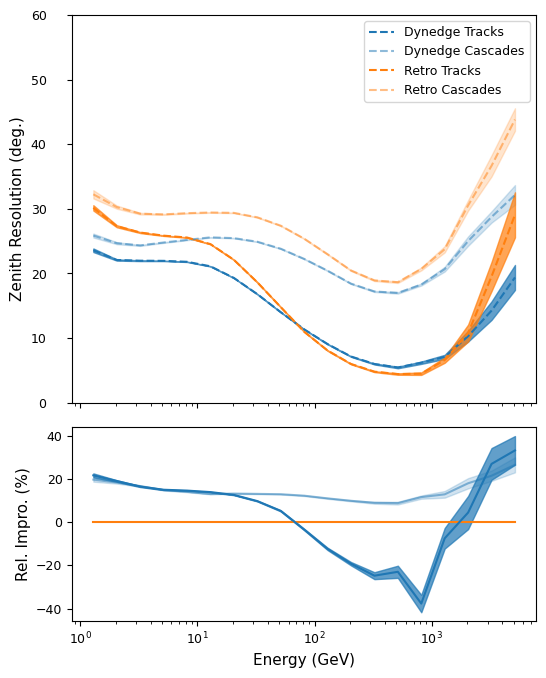

In [ ]:
print('Ready to plot it')

#Zenith updated versions vs baseline 
fig, axs = plt.subplots(2,1,figsize=set_size('thesis',subplots = (2,1)),sharex=True,height_ratios=[2, 1])
#axs2 = axs[0].twinx()
#axs2.hist(energies_test[0],energy_bins,color='C0',alpha=0.2)

for i in range(len(prediction_database_zenith_test)):
    res = bin_zenith_resolutions_test[i]
    axs[0].plot(bins_energy_middle[0],res,'--',label = labels[i],color=colors[i],alpha=alphas[i])
    if bootstrap_bool:
        std = bin_zenith_resolutions_bootstrap_std_test[i]
        axs[0].fill_between(bins_energy_middle[0],res-std,res+std,color=colors[i],alpha=alphas[i]-0.3)

axs[1].plot(bins_energy_middle[0],relative_improvement(bin_zenith_resolutions_test[2],bin_zenith_resolutions_test[2]),color=colors[2],alpha=alphas[2])
for i in [0,1]:
    res = bin_zenith_resolutions_test[i]
    vs = bin_zenith_resolutions_test[i+2]
    std = bin_zenith_resolutions_bootstrap_std_test[i]
    axs[1].plot(bins_energy_middle[0],relative_improvement(res,vs),color=colors[i],alpha=alphas[i])
    axs[1].fill_between(bins_energy_middle[0],relative_improvement(res+std,vs),relative_improvement(res-std,vs),color=colors[i],alpha=alphas[i]-0.3)

axs[0].set_ylabel('Zenith Resolution (deg.)')#,fontsize=fs)
axs[1].set_xlabel(r"Energy (GeV)")#,fontsize=fs)
#axs2.set_ylabel('Number of Events')#,fontsize=fs)
#axs2.set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend(loc ='upper right')#,fontsize=fs)
#axs2.legend(loc ='upper center')#,fontsize=fs)
axs[0].tick_params(axis='x')#, labelsize=fs2)
axs[0].tick_params(axis='y')#, labelsize=fs2)
#axs2.tick_params(axis='y')#, labelsize=fs2)
axs[0].tick_params(axis='both', which='major', pad=15)
axs[0].set_ylim(ymin=0,ymax = 60)
axs[1].set_ylabel('Rel. Impro. (%)')
#axs2.set_ylim(ymax = 10**7)
fig.tight_layout()
plt.tight_layout()
fig.savefig(outdir + 'Zenith_resolution_new_muon_vs_retro')

finished plotting
all done


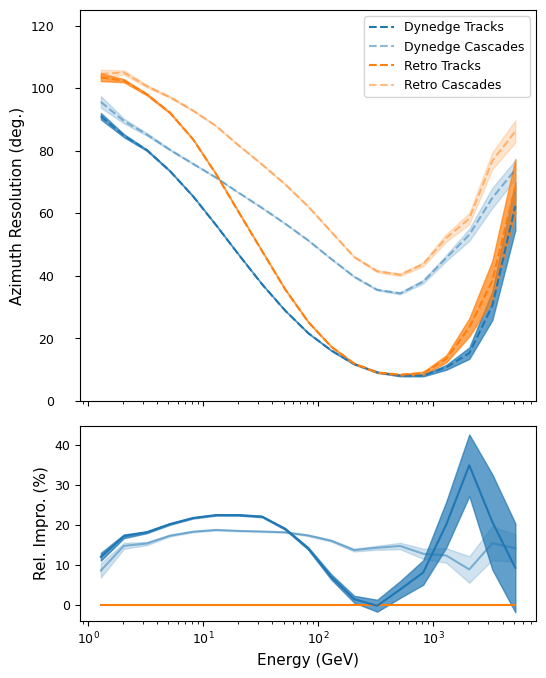

In [ ]:

#Azimuth updated versions vs baseline 
fig, axs = plt.subplots(2,1,figsize=set_size('thesis',subplots = (2,1)),sharex=True,height_ratios=[2, 1])
#axs2 = axs[0].twinx()
#axs2.hist(energies_test[0],energy_bins,color='C0',alpha=0.2)

for i in range(len(prediction_database_azimuth_test)):
    res = bin_azimuth_resolutions_test[i]
    axs[0].plot(bins_energy_middle[0],res,'--',label = labels[i],color=colors[i],alpha=alphas[i])
    if bootstrap_bool:
        std = bin_azimuth_resolutions_bootstrap_std_test[i]
        axs[0].fill_between(bins_energy_middle[0],res-std,res+std,color=colors[i],alpha=alphas[i]-0.3)


axs[1].plot(bins_energy_middle[0],relative_improvement(bin_azimuth_resolutions_test[2],bin_azimuth_resolutions_test[2]),color=colors[2],alpha=alphas[2])
for i in [0,1]:
    res = bin_azimuth_resolutions_test[i]
    vs = bin_azimuth_resolutions_test[i+2]
    std = bin_azimuth_resolutions_bootstrap_std_test[i]
    axs[1].plot(bins_energy_middle[0],relative_improvement(res,vs),color=colors[i],alpha=alphas[i])
    axs[1].fill_between(bins_energy_middle[0],relative_improvement(res+std,vs),relative_improvement(res-std,vs),color=colors[i],alpha=alphas[i]-0.3)


axs[0].set_ylabel('Azimuth Resolution (deg.)')#,fontsize=fs)

axs[1].set_xlabel(r"Energy (GeV)")#,fontsize=fs)
#axs2.set_ylabel('Number of Events')#,fontsize=fs)
#axs2.set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend(loc ='upper right')#,fontsize=fs)
axs[0].tick_params(axis='x')#, labelsize=fs2)
axs[0].tick_params(axis='y')#, labelsize=fs2)
#axs2.tick_params(axis='y')#, labelsize=fs2)
axs[0].tick_params(axis='both', which='major', pad=15)
axs[0].set_ylim(ymin=0,ymax=125)
axs[1].set_ylabel('Rel. Impro. (%)')
#axs2.set_ylim(ymax=10**6)
fig.tight_layout()
plt.tight_layout()

fig.savefig(outdir + 'Azimuth_resolution_new_muon_vs_retro')
print('finished plotting')
print('all done')

finished plotting
all done


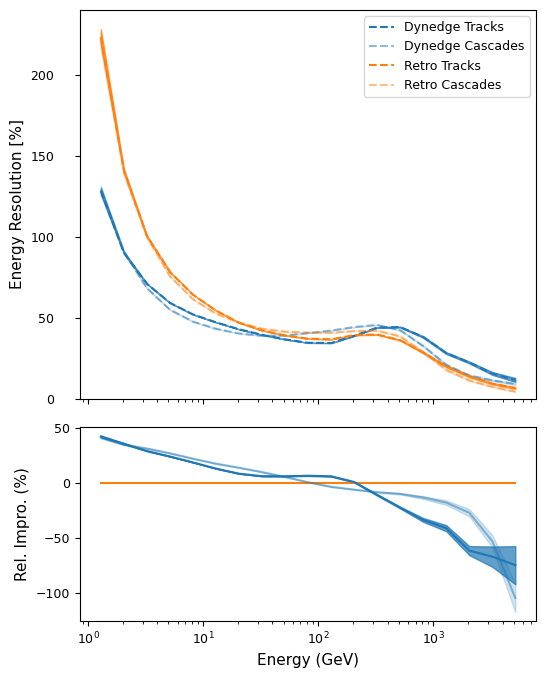

In [ ]:
#energy updated versions vs baseline 
fig, axs = plt.subplots(2,1,figsize=set_size('thesis',subplots = (2,1)),sharex=True,height_ratios=[2, 1])
#axs2 = axs[0].twinx()
#axs2.hist(energies_test[0],energy_bins,color='C0',alpha=0.2)

for i in range(len(prediction_database_energy_test)):
    res = np.array(bin_energy_resolutions_test[i])
    axs[0].plot(bins_energy_middle[0],res,'--',label = labels[i],color=colors[i],alpha=alphas[i])
    if bootstrap_bool:
        std = np.array(bin_energy_resolutions_bootstrap_std_test[i])
        axs[0].fill_between(bins_energy_middle[0],res-std,res+std,color=colors[i],alpha=alphas[i]-0.3)


axs[1].plot(bins_energy_middle[0],relative_improvement(bin_energy_resolutions_test[2],bin_energy_resolutions_test[2]),color=colors[2],alpha=alphas[2])
for i in [0,1]:
    res = np.array(bin_energy_resolutions_test[i])
    vs = np.array(bin_energy_resolutions_test[i+2])
    std = bin_energy_resolutions_bootstrap_std_test[i]
    axs[1].plot(np.array(bins_energy_middle[0]),relative_improvement(res,vs),color=colors[i],alpha=alphas[i])
    axs[1].fill_between(np.array(bins_energy_middle[0]),relative_improvement(res+std,vs),relative_improvement(res-std,vs),color=colors[i],alpha=alphas[i]-0.3)


axs[0].set_ylabel('Energy Resolution [%]')#,fontsize=fs)

axs[1].set_xlabel(r"Energy (GeV)")#,fontsize=fs)
#axs2.set_ylabel('Number of Events')#,fontsize=fs)
#axs2.set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend(loc ='upper right')#,fontsize=fs)
axs[0].tick_params(axis='x')#, labelsize=fs2)
axs[0].tick_params(axis='y')#, labelsize=fs2)
#axs2.tick_params(axis='y')#, labelsize=fs2)
axs[0].tick_params(axis='both', which='major', pad=15)
axs[0].set_ylim(ymin=0,ymax=240)
axs[1].set_ylabel('Rel. Impro. (%)')
#axs2.set_ylim(ymax=10**6)
fig.tight_layout()
plt.tight_layout()

fig.savefig(outdir + 'Energy_resolution_new_muon_vs_retro')
print('finished plotting')
print('all done')

finished plotting
all done


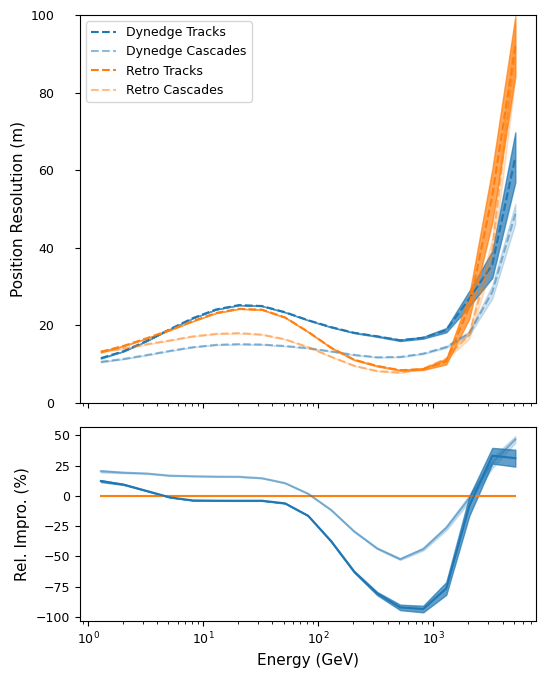

In [ ]:

fig, axs = plt.subplots(2,1,figsize=set_size('thesis',subplots = (2,1)),sharex=True,height_ratios=[2, 1])
#axs2 = axs[0].twinx()
#axs2.hist(energies_test[0],energy_bins,color='C0',alpha=0.2)
#axs2.hist(energies_test[1],energy_bins,color='C0',alpha=0.2)

for i in range(len(prediction_database_position_test)):
    res = np.array(bin_position_resolutions_test[i])
    axs[0].plot(bins_energy_middle[0],res,'--',label = labels[i],color=colors[i],alpha=alphas[i])
    if bootstrap_bool:
        std = np.array(bin_position_resolutions_bootstrap_std_test[i])
        axs[0].fill_between(bins_energy_middle[0],res-std,res+std,color=colors[i],alpha=alphas[i]-0.3)


axs[1].plot(bins_energy_middle[0],relative_improvement(bin_position_resolutions_test[2],bin_position_resolutions_test[2]),color=colors[2],alpha=alphas[2])
for i in [0,1]:
    res = np.array(bin_position_resolutions_test[i])
    vs = np.array(bin_position_resolutions_test[i+2])
    std = bin_position_resolutions_bootstrap_std_test[i]
    axs[1].plot(np.array(bins_energy_middle[0]),relative_improvement(res,vs),color=colors[i],alpha=alphas[i])
    axs[1].fill_between(np.array(bins_energy_middle[0]),relative_improvement(res+std,vs),relative_improvement(res-std,vs),color=colors[i],alpha=alphas[i]-0.3)


axs[0].set_ylabel('Position Resolution (m)')#,fontsize=fs)

axs[1].set_xlabel(r"Energy (GeV)")#,fontsize=fs)
#axs2.set_ylabel('Number of Events')#,fontsize=fs)
#axs2.set_yscale('log')
axs[0].set_xscale('log')
axs[0].legend(loc ='upper left')#,fontsize=fs)
axs[0].tick_params(axis='x')#, labelsize=fs2)
axs[0].tick_params(axis='y')#, labelsize=fs2)
#axs2.tick_params(axis='y')#, labelsize=fs2)
axs[0].tick_params(axis='both', which='major', pad=15)
axs[0].set_ylim(ymin=0,ymax=100)
axs[1].set_ylabel('Rel. Impro. (%)')
#axs2.set_ylim(ymax=10**6)
fig.tight_layout()
plt.tight_layout()

fig.savefig(outdir + 'position_resolution_new_muon_vs_retro')
print('finished plotting')
print('all done')

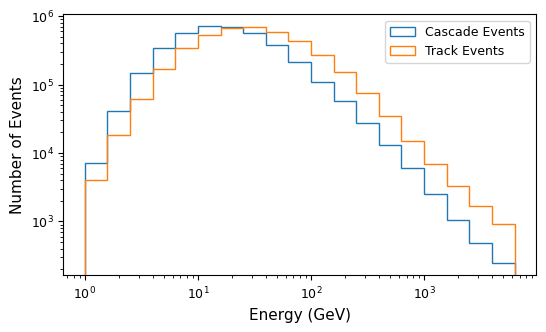

In [ ]:
fig, axs = plt.subplots(figsize=set_size('thesis'))
axs.hist(energies_test[0],energy_bins,color='C0',alpha=1,label='Cascade Events',histtype='step')
axs.hist(energies_test[1],energy_bins,color='C1',alpha=1,label='Track Events',histtype='step')

axs.set_ylabel('Number of Events')#,fontsize=fs)
axs.set_yscale('log')
axs.set_xscale('log')
axs.legend()
axs.set_xlabel(r"Energy (GeV)")#,fontsize=fs)
#axs.set_ylim(ymax=10**6)
fig.tight_layout()


fig.savefig(outdir + 'Resolution_plots_number_of_events')
